# Problem statement 1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

# Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

C:\Users\91982\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the dataset

In [2]:
cutlet = pd.read_csv("Cutlets.csv")

In [3]:
cutlet.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


### Summary statistics

In [4]:
cutlet.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


### Boxplot

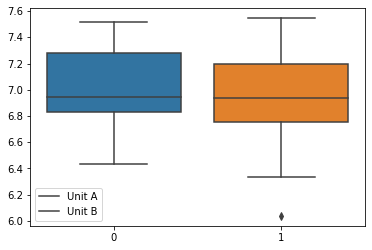

In [7]:
sns.boxplot(data=[cutlet['Unit A'],cutlet['Unit B']])
plt.legend(['Unit A','Unit B'])


### Distplot

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


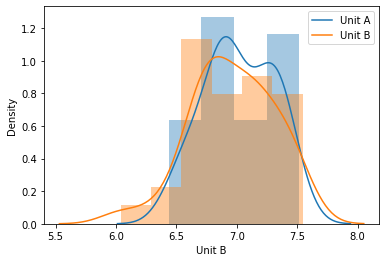

In [9]:
sns.distplot(cutlet['Unit A'])
sns.distplot(cutlet['Unit B'])
plt.legend(['Unit A','Unit B'])


In [12]:
alpha=0.05
UnitA=pd.DataFrame(cutlet['Unit A'])
UnitB=pd.DataFrame(cutlet['Unit B'])
print(UnitA)
print(UnitB)

    Unit A
0   6.8090
1   6.4376
2   6.9157
3   7.3012
4   7.4488
5   7.3871
6   6.8755
7   7.0621
8   6.6840
9   6.8236
10  7.3930
11  7.5169
12  6.9246
13  6.9256
14  6.5797
15  6.8394
16  6.5970
17  7.2705
18  7.2828
19  7.3495
20  6.9438
21  7.1560
22  6.5341
23  7.2854
24  6.9952
25  6.8568
26  7.2163
27  6.6801
28  6.9431
29  7.0852
30  6.7794
31  7.2783
32  7.1561
33  7.3943
34  6.9405
    Unit B
0   6.7703
1   7.5093
2   6.7300
3   6.7878
4   7.1522
5   6.8110
6   7.2212
7   6.6606
8   7.2402
9   7.0503
10  6.8810
11  7.4059
12  6.7652
13  6.0380
14  7.1581
15  7.0240
16  6.6672
17  7.4314
18  7.3070
19  6.7478
20  6.8889
21  7.4220
22  6.5217
23  7.1688
24  6.7594
25  6.9399
26  7.0133
27  6.9182
28  6.3346
29  7.5459
30  7.0992
31  7.1180
32  6.6965
33  6.5780
34  7.3875


##### We will use  t-test from scipy stats for determining whether there is any significant difference in the diameter of the cutlet between two units.

1. Null Hypothesis (H0)- There is no significant difference in the diameter of the cutlet between two points
2. Alternative Hypothesis (H1) - There is a significant difference in the diameter of the cutlet between two points

In [15]:
tStat,pValue =sp.stats.ttest_ind(UnitA,UnitB)
print(tStat)
print(pValue)

[0.72286887]
[0.47223947]


In [45]:
if pValue <alpha:
    print('We will reject null hypothesis')
else:
    print('We will accept null hypothesis')


We will accept null hypothesis


### Conclusion 

##### There is no significant difference in the diameters of the cutlet between two points

# Problem statement 2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [18]:
lab = pd.read_csv("LabTAT.csv")

In [19]:
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


### Summary statistics

In [20]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [21]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


### Boxplot

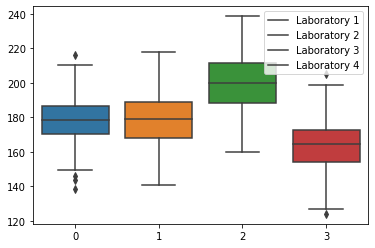

In [23]:
sns.boxplot(data=[lab['Laboratory 1'],lab['Laboratory 2'],lab['Laboratory 3'],lab['Laboratory 4']])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

### Distplot

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

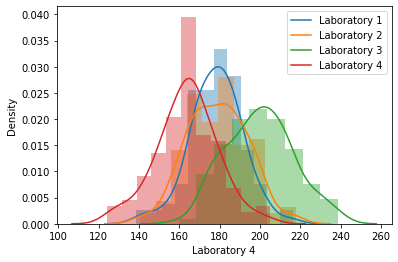

In [24]:
sns.distplot(lab['Laboratory 1'])
sns.distplot(lab['Laboratory 2'])
sns.distplot(lab['Laboratory 3'])
sns.distplot(lab['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])


In [27]:
alpha=0.05
lab1=pd.DataFrame(lab['Laboratory 1'])
lab2=pd.DataFrame(lab['Laboratory 2'])
lab3=pd.DataFrame(lab['Laboratory 3'])
lab4=pd.DataFrame(lab['Laboratory 4'])


print(lab1)
print(lab2)
print(lab3)
print(lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]
     Laboratory 2
0          165.53
1          185.91
2          194.92
3          183.00
4          169.57
..            ...
115        170.66
116        183.98
117        174.54
118        197.18
119        215.17

[120 rows x 1 columns]
     Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]
     Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


##### As we need to determine whether there is any difference in the average Turn Around Time (TAT), we will use one way ANOVA test.We will use  f_oneway from scipy stats

1. Null Hypothesis (H0)- There is no difference in the average Turn Around Time (TAT) in lab report
2. Alternative Hypothesis (H1) - There is a significant difference in the average Turn Around Time (TAT) in lab report

In [29]:
tStat, pvalue = sp.stats.f_oneway(lab1,lab2,lab3,lab4)
print(tStat)
print(pvalue)


[118.70421654]
[2.11567089e-57]


In [43]:
if pValue <alpha:
    print('We will reject null hypothesis')
else:
    print('We will accept null hypothesis')


We will accept null hypothesis


##### There is no difference in the average Turn Around Time (TAT) in lab report for the laboratories


# Problem statement 3

In [31]:
buyer = pd.read_csv("BuyerRatio.csv")

In [32]:
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [33]:
buyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [34]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


### Boxplots

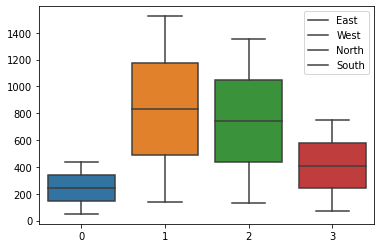

In [41]:
sns.boxplot(data=[buyer['East'],buyer['West'],buyer['North'],buyer['South']])
plt.legend(['East','West','North','South'])

### Distplots

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

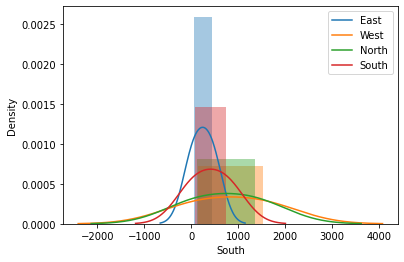

In [36]:
sns.distplot(buyer['East'])
sns.distplot(buyer['West'])
sns.distplot(buyer['North'])
sns.distplot(buyer['South'])

plt.legend(['East','West','North','South'])


In [46]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)


[[50, 142, 131, 70], [435, 1523, 1356, 750]]


#### Defining Hypothesis

1. H0 = All proportions are equal
2. H1 = All proprtions are not equal

In [49]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')

if chiStats[1] < alpha:
    print('We reject null hypothesis')
else:  
    print('We accept null hypothesis')


Test t=1.595946 p-value=0.660309
Interpret by p-Value
We accept null hypothesis


### Conclusion 

##### All proportions are equal for the buyer ratio

# Problem statement 4

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. 

Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [54]:
tele = pd.read_csv("Customer_OrderForm.csv")

In [55]:
tele.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [56]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


### Summary statistics

In [57]:
tele.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [59]:
tele['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [60]:
tele['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [61]:
tele['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [62]:
tele['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

#### Defining Hypothesis -

1. H0 - The proportion of defective percentage of customer orders across the center is same

2. H1 - The proportion of defective percentage of customer orders across the center is not same


In [64]:
alpha =0.05
chiStats = sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < alpha:
    print('We reject null hypothesis')
else:
    print('We accept null hypothesis')


Test t=3.858961 p-value=0.277102
Interpret by p-Value
We accept null hypothesis


In [65]:
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
observed_chi_val = chiStats[0]
print('Interpret by critical value')
if observed_chi_val <= critical_value:
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    print ('Null hypothesis cannot be excepted (variables are not independent)')


Interpret by critical value
Null hypothesis cannot be rejected (variables are not related)


##### We could say that the proportion of defective percentage of customer orders across the center is same